In [48]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
# Enable copy-on-write mode for pandas DataFrames
pd.set_option("mode.copy_on_write", True)

# Downloads and loads the dataset from Kaggle and returns the CSV path
def download_data():
    path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
    files = os.listdir(path)
    csv_file = files[0]
    return os.path.join(path, csv_file)


# Reads in the dataset
def load_data(csv_path: str) -> pd.DataFrame:
    return pd.read_csv(csv_path, encoding="ISO-8859-1")

# Load the data
df = load_data(download_data())

In [29]:
# Inspect the dataset
# Print the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

# Display the first few rows of the dataset
print("\nFirst five rows of the dataset:")
print(df.head(5))

# Get general information about the dataset
print("\nGeneral information about the dataset:")
print(df.info())

# Data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

#Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows in the dataset: {duplicate_count}")

# Check unique genres
unique_genres = df['track_genre'].unique()
print("\nUnique Genres:")
print(unique_genres)

# Summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())

Shape of the dataset: (114000, 21)

First five rows of the dataset:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   


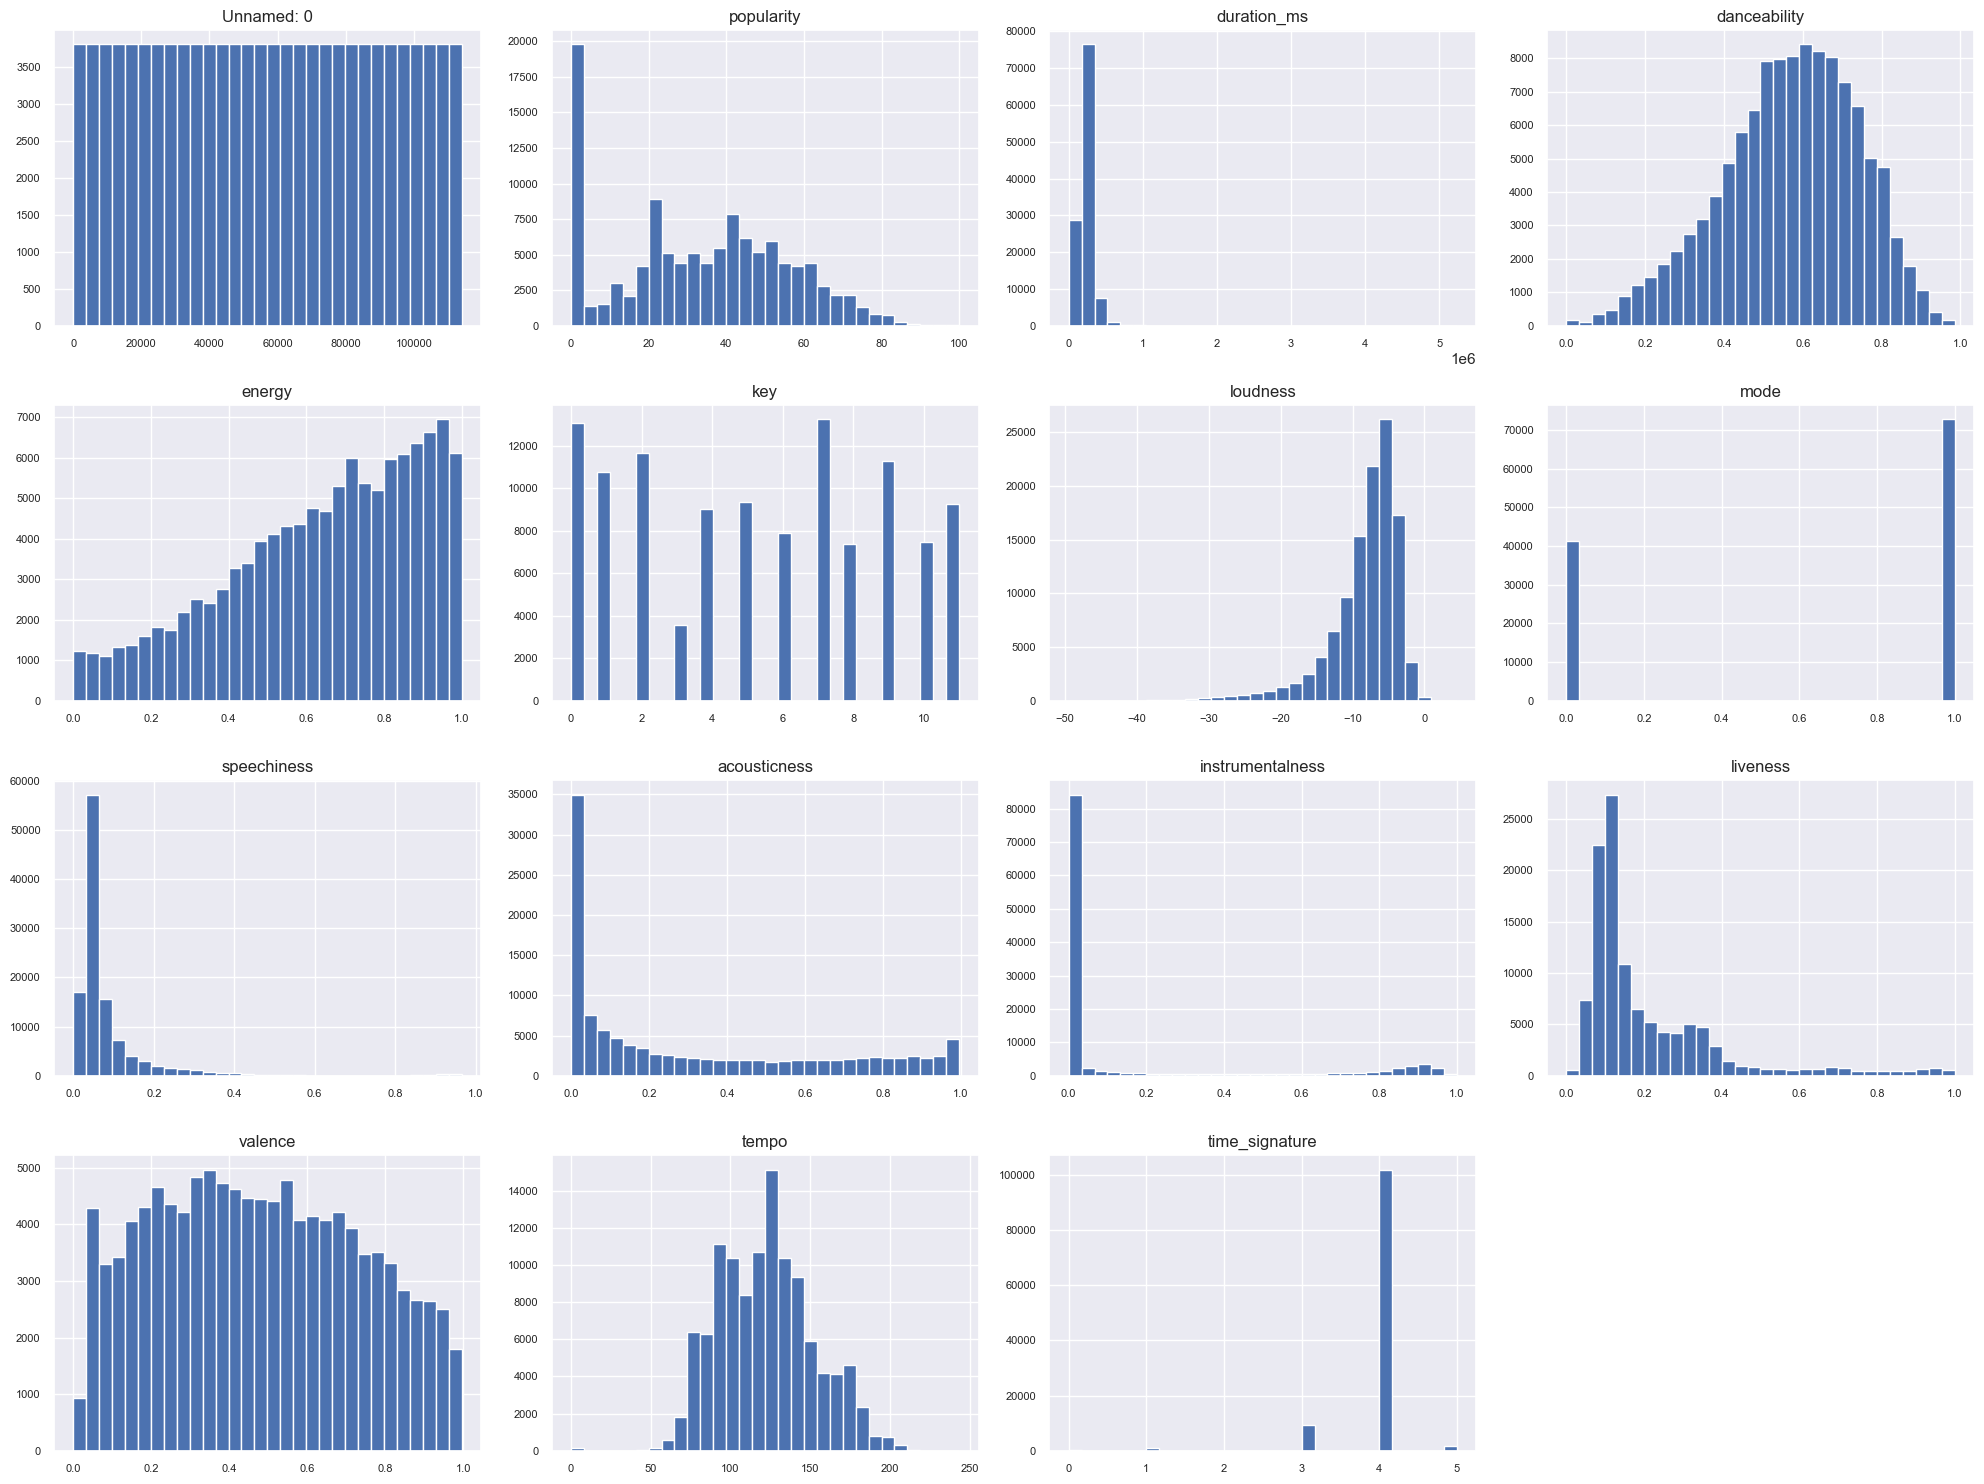

In [53]:
# Histograms for numerical columns
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]

sns.set_style('darkgrid')
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

/var/folders/kk/mftjtndn3s9g02vfmgsch7qr0000gn/T/ipykernel_47734/3146595114.py:47: UserWarning: Glyph 147 (\x93) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kk/mftjtndn3s9g02vfmgsch7qr0000gn/T/ipykernel_47734/3146595114.py:47: UserWarning: Glyph 154 (\x9a) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 154 (\x9a) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


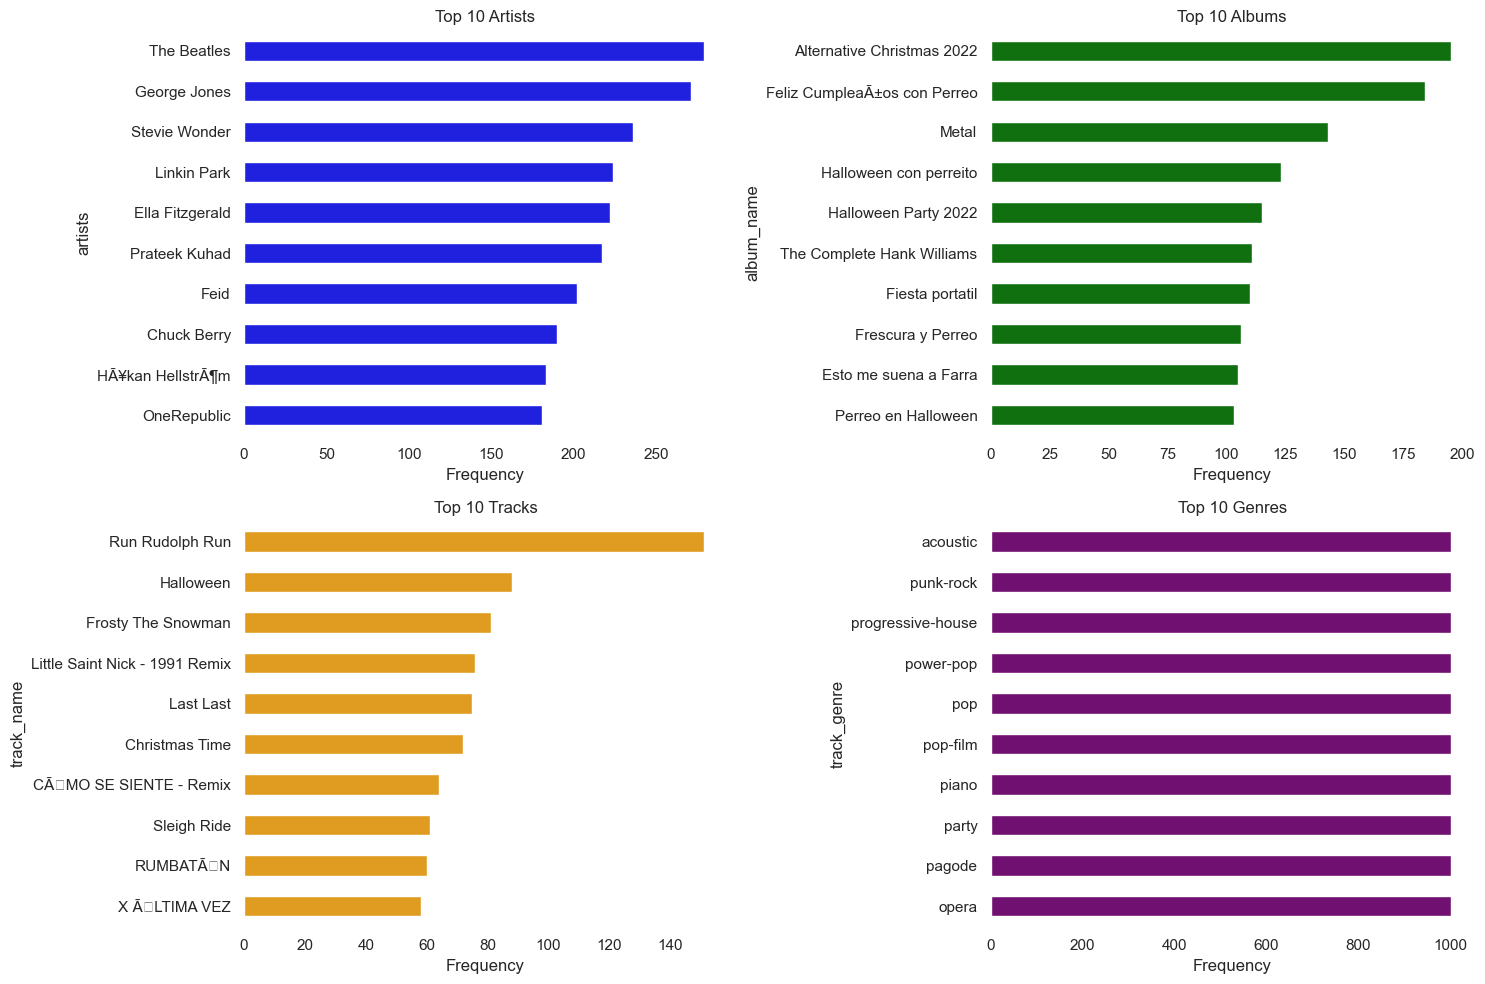

In [50]:
# Bar plots for top 10 artists, albums, tracks, and genres

top_n = 10
sns.set_style('white')
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"}) 

# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top_n)
top_albums = df['album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['track_genre'].value_counts().head(top_n)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Top N Artists
    sns.barplot(x=top_artists.values, y=top_artists.index, color='blue', ax=axes[0, 0], orient='h', zorder=3, width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Albums
    sns.barplot(x=top_albums.values, y=top_albums.index, color='green', ax=axes[0, 1], orient='h', zorder=3, width=0.5)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sns.barplot(x=top_tracks.values, y=top_tracks.index, color='orange', ax=axes[1, 0], orient='h', zorder=3, width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sns.barplot(x=top_genres.values, y=top_genres.index, color='purple', ax=axes[1, 1], orient='h', zorder=3, width=0.5)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()


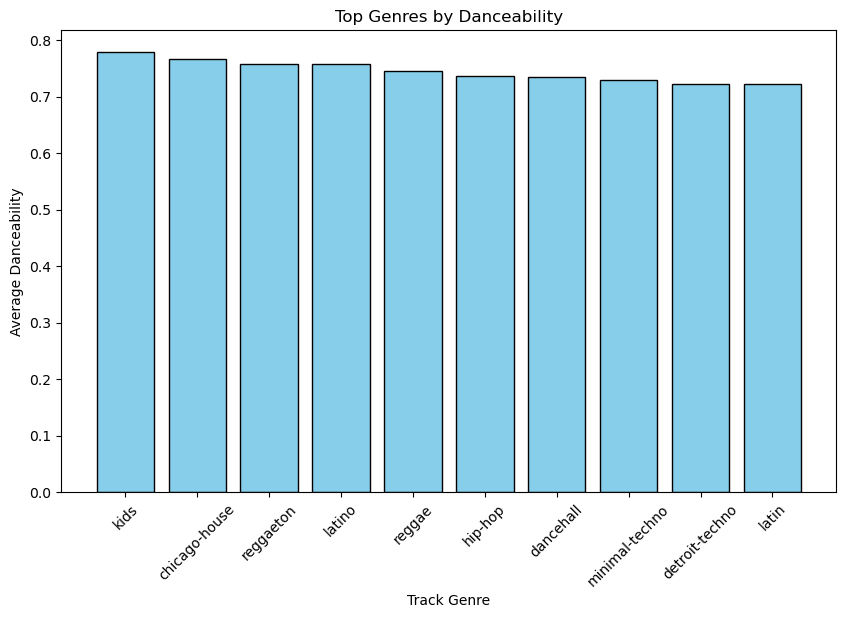

In [23]:
# Top 10 genres by average danceability
feature_cols = ['danceability', 'energy', 'acousticness', 'speechiness']
genre_avg = df.groupby('track_genre')[feature_cols].mean().reset_index()
top_genres = genre_avg.sort_values('danceability', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_genres['track_genre'], top_genres['danceability'], color='skyblue', edgecolor='black')
plt.title('Top Genres by Danceability')
plt.xlabel('Track Genre')
plt.ylabel('Average Danceability')
plt.xticks(rotation=45)
plt.show()


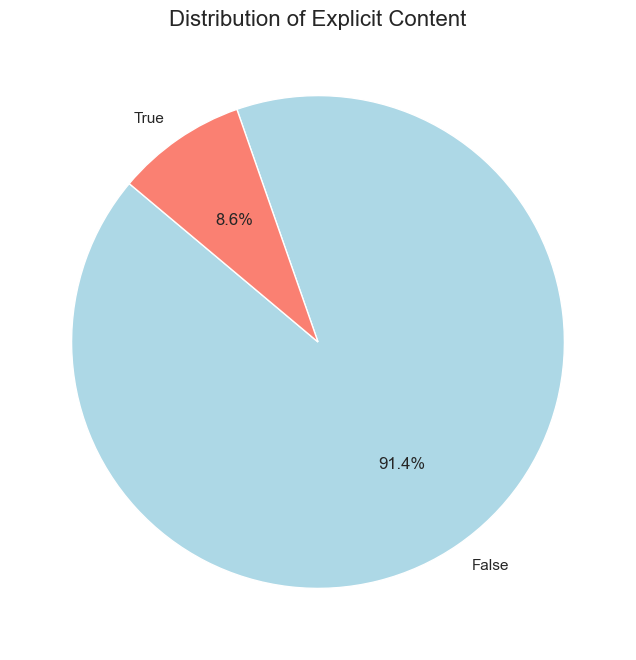

In [51]:
# Pie chart of explicit content
explicit_counts = df['explicit'].value_counts()     
plt.figure(figsize=(8, 8))
plt.pie(explicit_counts, labels=explicit_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'])
plt.title('Distribution of Explicit Content', fontsize=16)
plt.show()

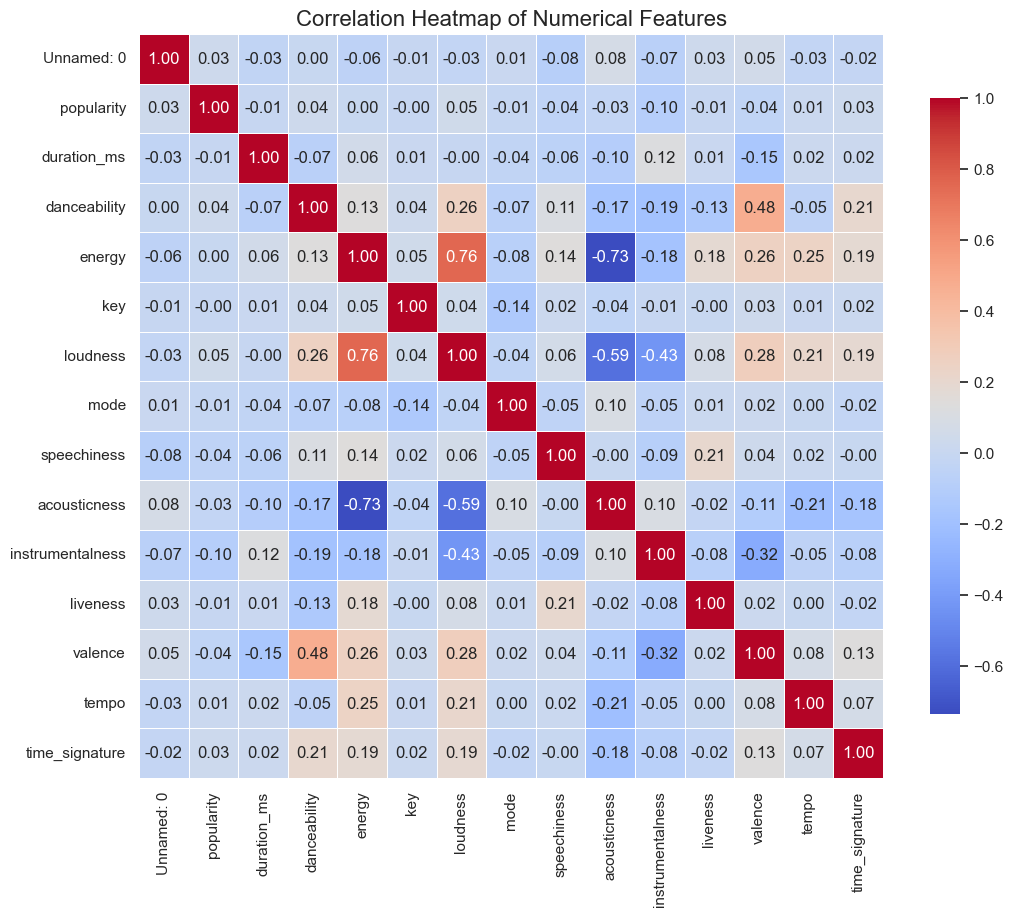

In [54]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
corr = numerical_cols.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()      

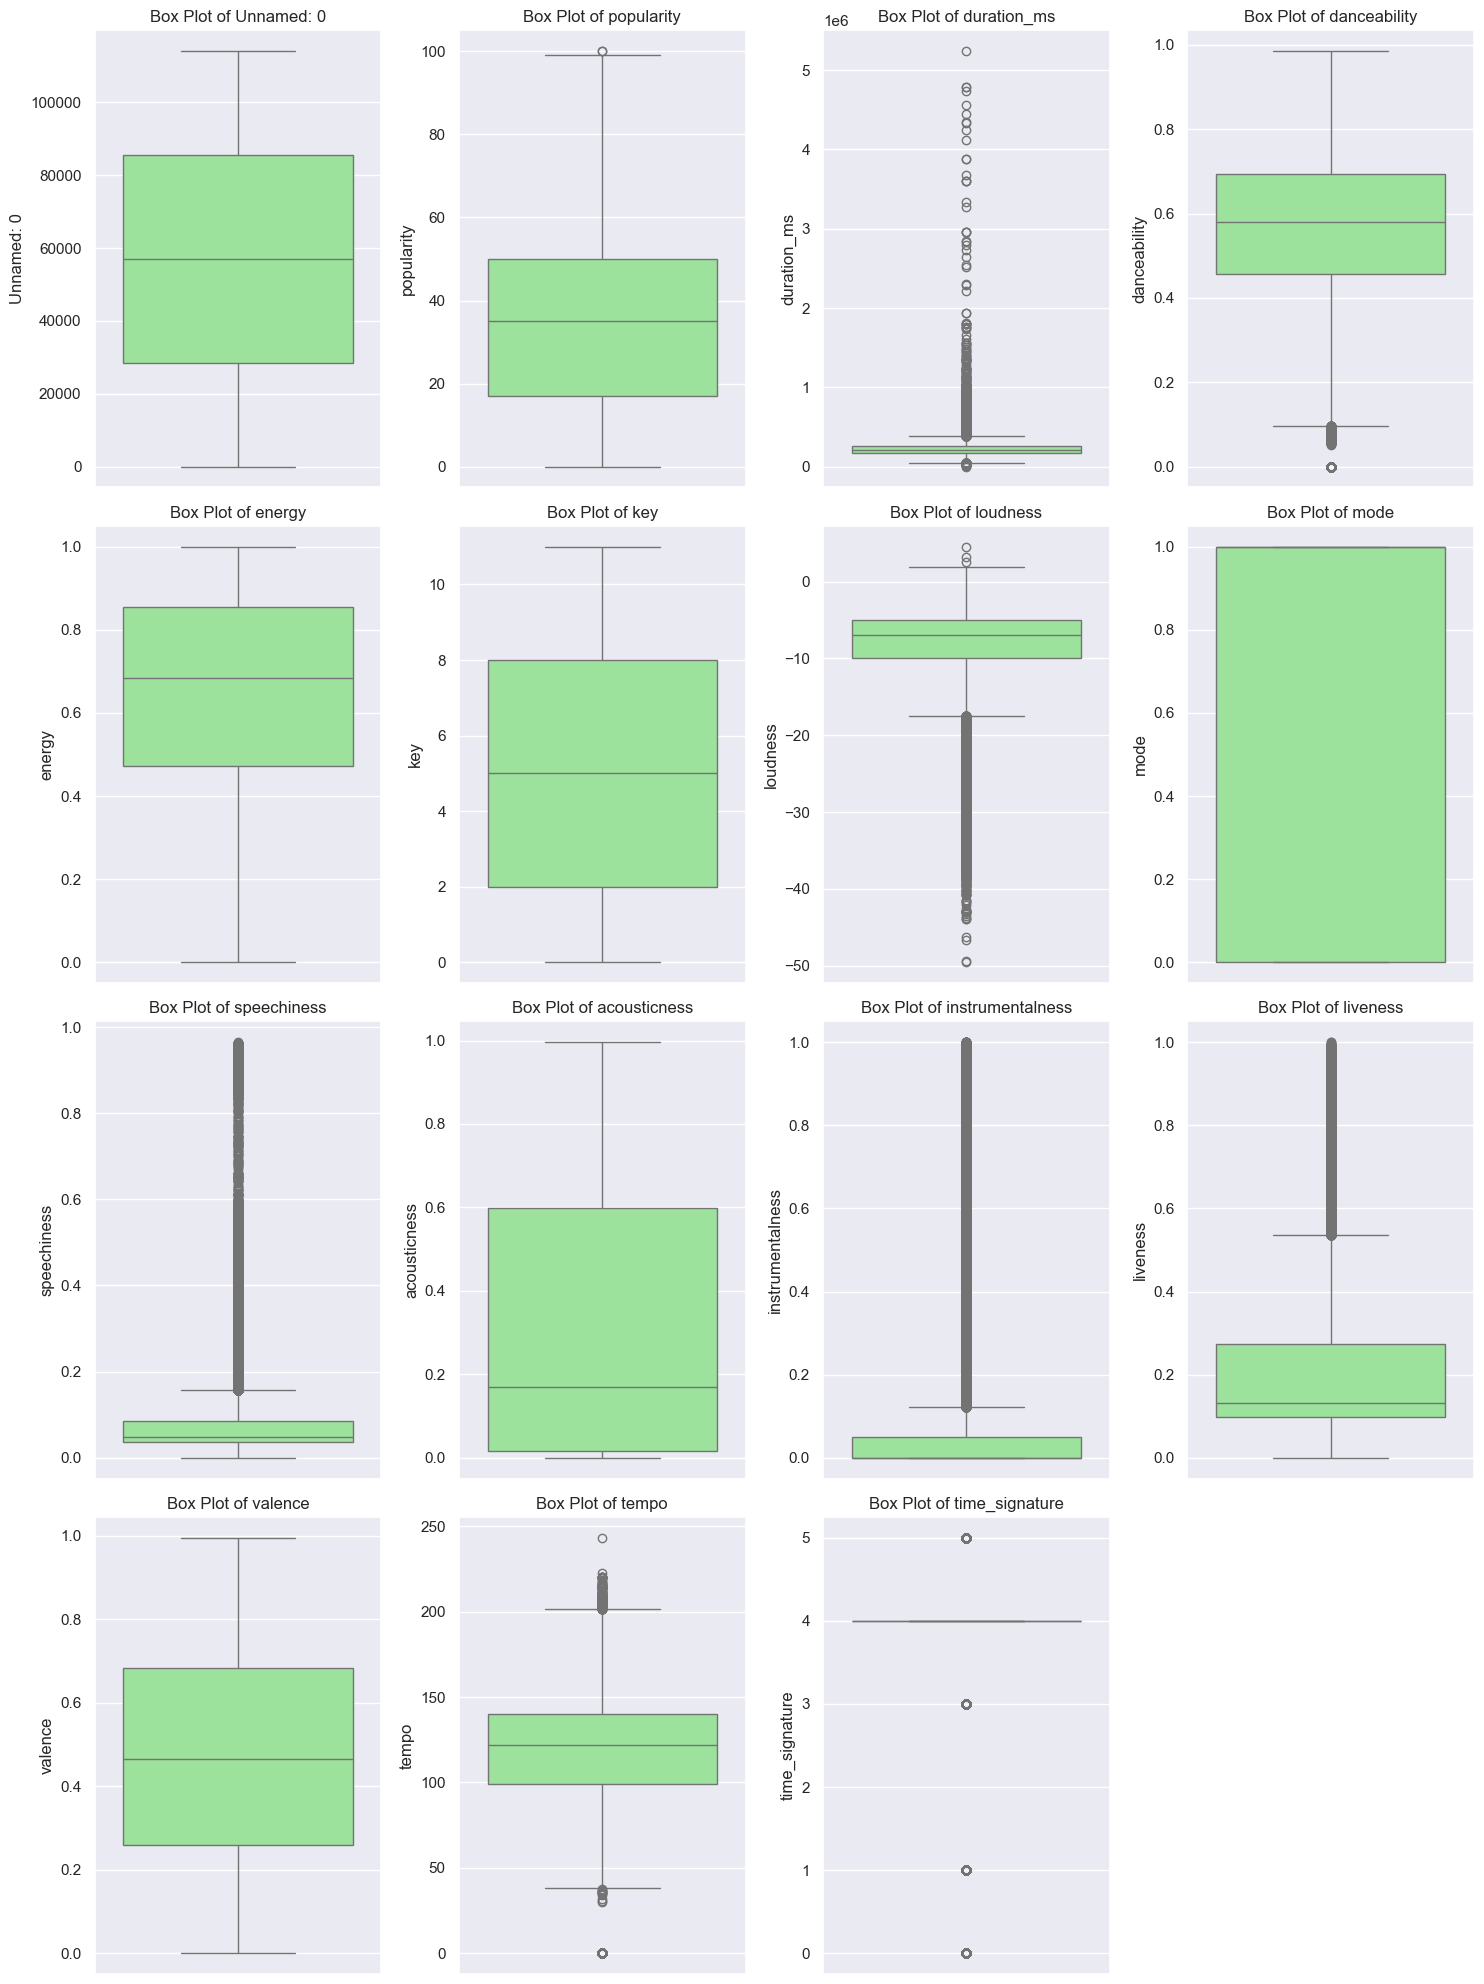

In [60]:
# Outlier detection using box plots for numerical features


num_features = len(numerical_cols.columns)
num_cols = 4  
num_rows = (num_features + num_cols - 1) // num_cols 
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [61]:
# Top 10 most danceable tracks
top_danceable = df.sort_values(by='danceability', ascending=False).head(10)[['track_name', 'artists', 'danceability']]
print("\nTop 10 Most Danceable Tracks:")
print(top_danceable.to_string(index=False))     


Top 10 Most Danceable Tracks:
                                               track_name                            artists  danceability
                                                 Sol Clap                            Quantic         0.985
                                            Medicaid Baby                  That Girl Lay Lay         0.984
                                              Inspiration                       Delano Smith         0.983
                                           Daily Routines                    Oliver Schories         0.982
Featuring Mixx Master Lee, Red Rum & J. Smoov (Funky Mix)                    Mixx Master Lee         0.981
                                                  Bitches                            dj funk         0.981
                                        Plastik Fantastik                  Felix Da Housecat         0.980
                                       Dancing in My Room                           347aidan         0.980
      

In [62]:
# Top 10 artists by number of tracks
top_artists_tracks = df['artists'].value_counts().head(10)
print("\nTop 10 Artists by Number of Tracks:")
print(top_artists_tracks.to_string())


Top 10 Artists by Number of Tracks:
artists
The Beatles          279
George Jones         271
Stevie Wonder        236
Linkin Park          224
Ella Fitzgerald      222
Prateek Kuhad        217
Feid                 202
Chuck Berry          190
HÃ¥kan HellstrÃ¶m    183
OneRepublic          181


In [64]:
# Top 10 songs by popularity
top_popular_songs = df.sort_values(by='popularity', ascending=False).head(10)[['track_name', 'artists', 'popularity']]
print("\nTop 10 Songs by Popularity:")
print(top_popular_songs.to_string(index=False))


Top 10 Songs by Popularity:
                           track_name                 artists  popularity
            Unholy (feat. Kim Petras)    Sam Smith;Kim Petras         100
            Unholy (feat. Kim Petras)    Sam Smith;Kim Petras         100
Quevedo: Bzrp Music Sessions, Vol. 52        Bizarrap;Quevedo          99
                      I'm Good (Blue) David Guetta;Bebe Rexha          98
                           La Bachata           Manuel Turizo          98
                           La Bachata           Manuel Turizo          98
                           La Bachata           Manuel Turizo          98
                      I'm Good (Blue) David Guetta;Bebe Rexha          98
                      I'm Good (Blue) David Guetta;Bebe Rexha          98
                           La Bachata           Manuel Turizo          98


In [66]:
# Top 5 danceable songs in the top 5 genres
top_5_genres = df['track_genre'].value_counts().head(5).index
print("\nTop 5 Danceable Songs in the Top 5 Genres:")
for genre in top_5_genres:  
    genre_songs = df[df['track_genre'] == genre]
    top_danceable_in_genre = genre_songs.sort_values(by='danceability', ascending=False).head(5)[['track_name', 'artists', 'danceability']]
    print(f"\nGenre: {genre}")
    print(top_danceable_in_genre.to_string(index=False))


Top 5 Danceable Songs in the Top 5 Genres:

Genre: acoustic
                          track_name              artists  danceability
                        Drag Me Down Son&Dad;Filip Nordin         0.879
I Wanna Be Your Ghost (feat. Ghosts)          Gen Hoshino         0.829
                            Spoonful         Howlin' Wolf         0.821
      Leave The Door Open - Acoustic          Blame Jones         0.817
                              Pilots          Andrew Ripp         0.809

Genre: punk-rock
                               track_name         artists  danceability
         Daft Punk Is Playing at My House LCD Soundsystem         0.922
                          Percussion Baby            Sumo         0.890
                            Pinini Reggae            Sumo         0.853
                SÃ³lo Un Hombre De Suerte             GIT         0.808
ÐÐ²ÐµÐ·Ð´Ð° Ð¿Ð¾ Ð¸Ð¼ÐµÐ½Ð¸ Ð¡Ð¾Ð»Ð½ÑÐµ            Kino         0.807

Genre: progressive-house
                               

In [67]:
# Top 10 artists with the highest danceability scores
top_danceable_artists = df.groupby('artists')['danceability'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Artists with the Highest Danceability Scores:")
print(top_danceable_artists.to_string())


Top 10 Artists with the Highest Danceability Scores:
artists
DJ Pierre;My Digital Enemy;Hatiras                        0.979
Casper & Col'ta                                           0.978
Vybz Kartel;Tommy Lee                                     0.975
Electric Slide Dance Party DJ's                           0.974
Chip E.;Jamie 3:26                                        0.974
BaianaSystem;Tropkillaz                                   0.974
Neo Pistea;0-600;C.R.O;Mike Southside;CoqeÃ©in Montana    0.971
Cajmere;Claude VonStroke                                  0.970
MHD                                                       0.970
Moliy;Juls                                                0.969


In [68]:
# Most populat and least popular genres
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
most_popular_genres = genre_popularity.head(5)
least_popular_genres = genre_popularity.tail(5)
print("\nMost Popular Genres:")
print(most_popular_genres.to_string())
print("\nLeast Popular Genres:")
print(least_popular_genres.to_string())


Most Popular Genres:
track_genre
pop-film    59.283
k-pop       56.896
chill       53.651
sad         52.379
grunge      49.594

Least Popular Genres:
track_genre
chicago-house     12.339
detroit-techno    11.174
latin              8.297
romance            3.245
iranian            2.210


In [69]:
# Top and bottom genres by energy levels
genre_energy = df.groupby('track_genre')['energy'].mean().sort_values(ascending=False)
top_energy_genres = genre_energy.head(5)
bottom_energy_genres = genre_energy.tail(5)
print("\nTop Genres by Energy Levels:")
print(top_energy_genres.to_string())
print("\nBottom Genres by Energy Levels:")
print(bottom_energy_genres.to_string())     


Top Genres by Energy Levels:
track_genre
death-metal    0.931470
grindcore      0.924201
metalcore      0.914485
happy          0.910971
hardstyle      0.901246

Bottom Genres by Energy Levels:
track_genre
disney       0.302519
romance      0.294304
ambient      0.237162
new-age      0.214501
classical    0.189827


In [ ]:
# Top artists and songs with the highest energy levels
top_energy_artists = df.groupby('artists')['energy'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Artists with the Highest Energy Levels:")
print(top_energy_artists.to_string())

top_energy_songs = df.sort_values(by='energy', ascending=False).head(10)[['track_name', 'artists', 'energy']]
print("\nTop 10 Songs with the Highest Energy Levels:")
print(top_energy_songs.to_string(index=False))  


Top 10 Artists with the Highest Energy Levels:
artists
Rain for Sleep                                                      1.000
Nature Sounds;Nature Sounds Nature Music;Nature Sound Collection    1.000
Thunder Storm                                                       1.000
Willi Herren                                                        1.000
White Noise Research                                                1.000
Mike Der Bademeister;Schwalmrebellen                                1.000
NG Rezonance;Peter Berry                                            0.999
Mutiilation                                                         0.999
Neophyte;Scott Brown;Restrained                                     0.999
dj funk;TJR                                                         0.999

Top 10 Songs with the Highest Energy Levels:
                                                                  track_name                                                 artists  energy
                 

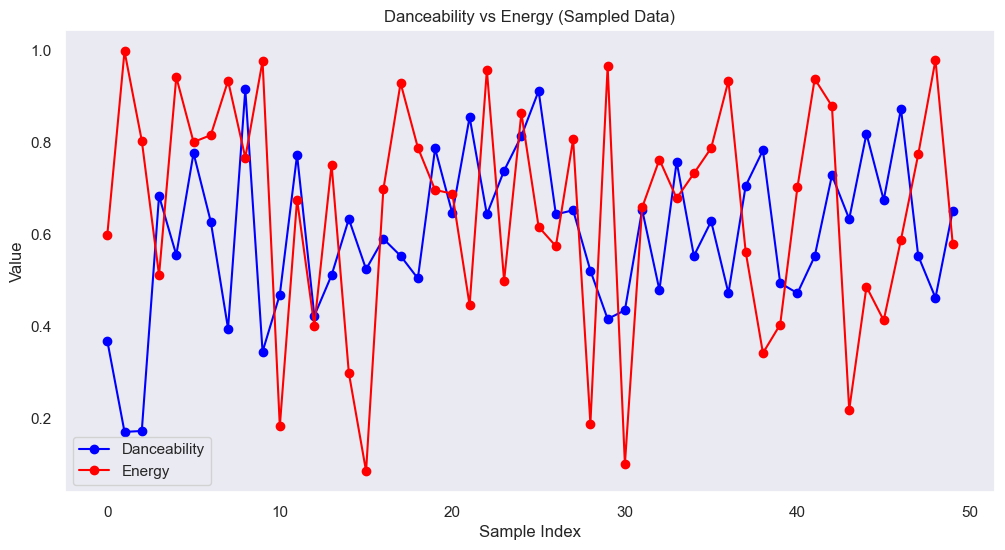

In [76]:
# Dancability vs Energy line plot (50 samples for clarity)
sampled_df = df.sample(n=50, random_state=42).reset_index(drop=True)  # Reset index without retaining the old one
plt.figure(figsize=(12, 6))
plt.plot(range(len(sampled_df)), sampled_df['danceability'], marker='o', label='Danceability', color='blue')
plt.plot(range(len(sampled_df)), sampled_df['energy'], marker='o', label='Energy', color='red')

plt.title('Danceability vs Energy (Sampled Data)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

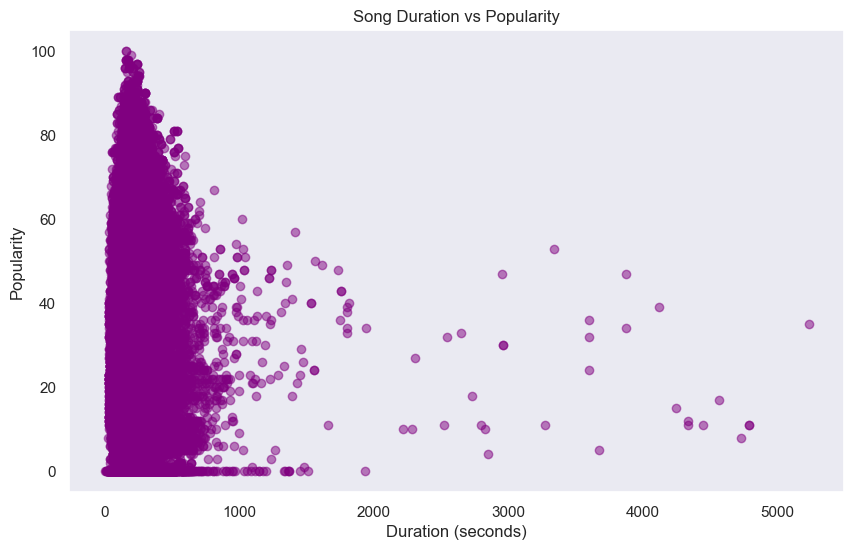

In [78]:
# Song duration vs. popularity scatter plot
# Convert duration from milliseconds to seconds
df['duration_sec'] = df['duration_ms'] / 1000

plt.figure(figsize=(10, 6))
plt.scatter(df['duration_sec'], df['popularity'], alpha=0.5, color='purple')
plt.title('Song Duration vs Popularity')
plt.xlabel('Duration (seconds)')
plt.ylabel('Popularity')
plt.grid()
plt.show()

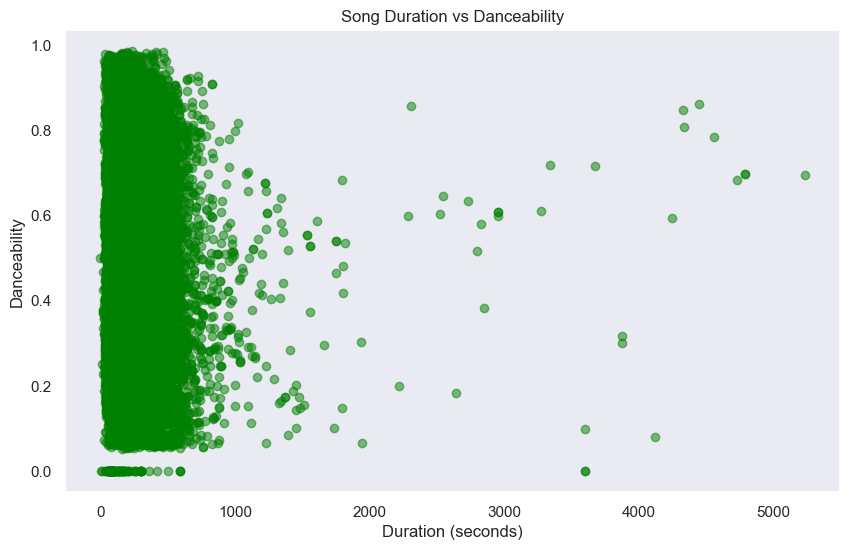

In [79]:
# Song duration and danceability relationship scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['duration_sec'], df['danceability'], alpha=0.5, color='green')
plt.title('Song Duration vs Danceability')
plt.xlabel('Duration (seconds)')
plt.ylabel('Danceability')
plt.grid()
plt.show()

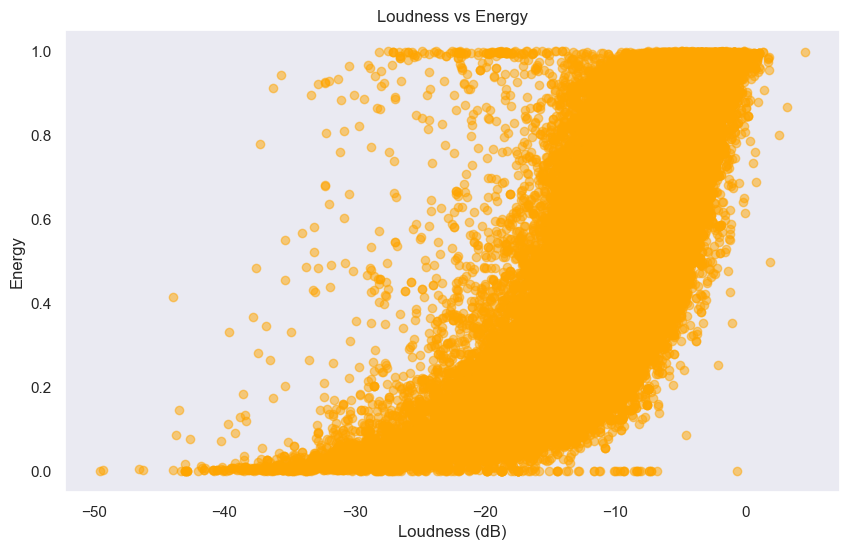

In [80]:
# Loudness vs. energy scatter plot
plt.figure(figsize=(10, 6)) 
plt.scatter(df['loudness'], df['energy'], alpha=0.5, color='orange')
plt.title('Loudness vs Energy')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.grid()
plt.show()

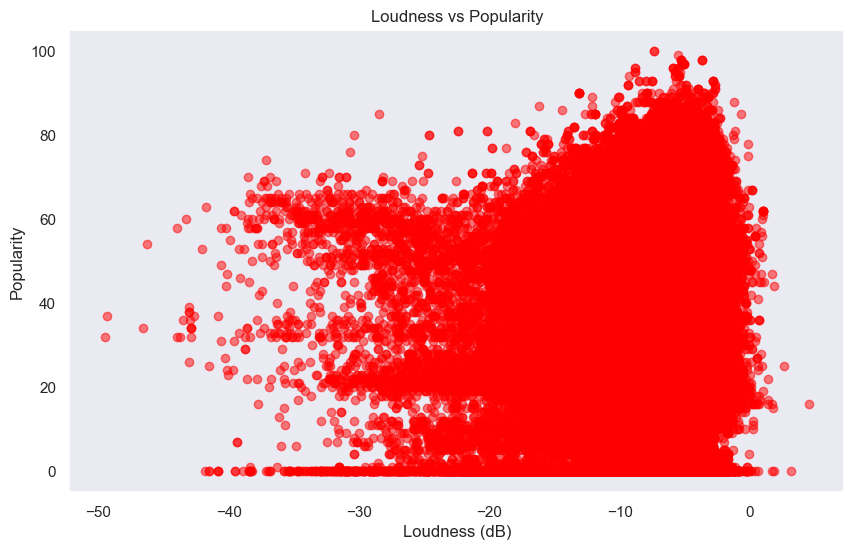

In [81]:
# loudness vs. popularity scatter plot
plt.figure(figsize=(10, 6)) 
plt.scatter(df['loudness'], df['popularity'], alpha=0.5, color='red')
plt.title('Loudness vs Popularity')
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')
plt.grid()
plt.show()